In [1]:
from datetime import datetime, timedelta

from tqdm import tqdm
from pytz import timezone
############################## create api 

from alpaca_trade_api.rest import REST, TimeFrame
from alpaca_trade_api.stream import Stream
import alpaca_trade_api as tradeapi

import numpy as np


In [2]:
from strategy.backtest import RollingBackTest, APISettings, BackTest
import matplotlib.pyplot as plt


In [6]:
import yfinance as yf


In [3]:
def get_data(tiker='^IXIC', start="2022-05-05", end="2022-05-06", which='Close', interval='1m'):
    '''
    # Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    # Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    # see https://github.com/ranaroussi/yfinance/blob/9eef951acc70121e65825ad25e7afd2edd4c3e4b/yfinance/multi.py
    '''
    
    def reformulate_date(df):
        df.columns = df.columns.map(''.join)
        df = df.rename_axis('Date').reset_index()
        return df
    data = yf.download(tickers = tiker, start=start, end=end, interval = interval, progress=False)
    data['pct_change'] = data[which].pct_change()
    data['log_ret'] = np.log(data[which]) - np.log(data[which].shift(1))
    data = reformulate_date(data)
    data = data[:-1]
    #print("most recent date is ", data.iloc[-1, 0])
    return data

In [4]:
start_testing_date = '2022-06-08'
testing_length = 1

class Momentum_settings:
    '''
    if you found it is more likely to enter "long stage"
        - you should set higher threshold for short, but lower threshold for long
    '''
    long_buy_thres = 0
    long_sell_thres = 0
    short_buy_thres = 5
    short_sell_thres = 5
    ema_smooth_factor = 5 # long-term indicator as ema smooth factor
    # if larger, slower track of current price, more consistent
    dif_smooth_factor = 2 # price smooth factor for computing momentum
    

rollingbacktest = RollingBackTest(
    Momentum_settings(),
    APISettings(),
    'momentum',
    start_testing_date,
    testing_length,
    '^IXIC',
    'TQQQ',
    'SQQQ',
    '2m',
    False
)

print(rollingbacktest.total_rets, '\n')

print(rollingbacktest.rets_noncomp, '\n')

print('mean of acumulated ret: ', np.mean(rollingbacktest.total_rets), '\n')

print(np.mean(rollingbacktest.rets_noncomp), '\n')


start testing...


100%|██████████| 28/28 [00:09<00:00,  2.94it/s]

[0.9882895791647587, 1.040272513249316, 0.9977099914457912, 0.9533185533241257, 1.0140119653240123, 1.0826133841795957, 0.9967814725535422, 0.991182159707859, 0.9659447482212924, 1.0060098484242435, 1.0152817262048959, 1.019685104945033, 1.0264556378033618, 0.995067716854567, 0.9654872366324703, 1.1386072419573439, 1.0047595091628145, 1.065696182779584, 0.9898601236187883, 1.0268809937079215, 1.0471624502405816, 1.0313669921323247, 1.0288586043784236, 0.9501563865437475, 0.9864711134970686, 0.9519070436385254, 1.009454658582931, 1.0406110195790603] 

[1.0000379530212924, 1.000005162916251, 0.9999268601302601, 0.9997032364446068, 1.0001508932470717, 1.000356902685451, 0.9998722265936321, 0.9999568543258887, 0.9999916630951908, 1.0001212618900748, 1.0001088732225873, 1.0000245074132523, 1.0000052791822547, 0.9998463884204472, 0.9998658663226667, 1.000326584582569, 1.0000393036807524, 1.0004264415814672, 0.9998214646769803, 1.0001612531202977, 1.000149266255747, 1.0000862977193374, 0.9999

In [13]:
today = '2022-07-21'
df_vix = get_data(tiker='^VIX', start='2022-06-08', end= today, interval='1d')

In [14]:
df_vix['avg'] = (df_vix['High'] + df_vix['Low'])/2

In [15]:
vix = df_vix['avg'].values

In [16]:
len(vix)

28

In [12]:
len(rollingbacktest.total_rets)

28

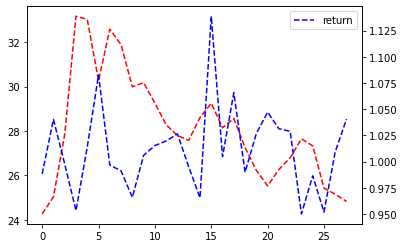

In [21]:
fig, ax = plt.subplots()
plt.plot(vix, '--r', label='Line a')
#ax.tick_params('vals', colors='r')

# Get second axis
ax2 = ax.twinx()
plt.plot(rollingbacktest.total_rets, '--b', label='return')
plt.legend()
#ax.tick_params('vals', colors='b')